In [14]:
pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.


In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasRegressor


In [171]:
df =pd.read_csv("Data set_InGaAs.csv")

In [172]:
df

,GOX,LSDC,NC,NSD,FG,W,H,Lg,LSP,nPerDecade,...,Vdd,Rfb,WK,Vth,gmax,ioff,isat,sslop,Vt,rout
0,0.001,0.01,1.000000e+17,3.000000e+19,0.008,0.022,0.008,0.032,0.01,1,...,0.1,0,4.8,0.170425,0.000198,6.410000e-14,0.000084,0.059884,0.186132,4.064100e+08
1,0.001,0.01,1.000000e+17,3.000000e+19,0.008,0.022,0.008,0.032,0.02,1,...,0.1,0,4.8,0.172339,0.000178,6.100000e-14,0.000073,0.059891,0.187541,4.270522e+08
2,0.001,0.01,1.000000e+17,3.000000e+19,0.008,0.022,0.008,0.012,0.01,1,...,0.1,0,4.8,0.112499,0.000261,3.250000e-12,0.000107,0.065732,0.169880,8.772908e+06
3,0.001,0.01,1.000000e+17,3.000000e+19,0.008,0.022,0.008,0.012,0.02,1,...,0.1,0,4.8,0.104652,0.000209,3.490000e-12,0.000083,0.066889,0.158831,8.325598e+06
4,0.001,0.01,1.000000e+17,3.000000e+19,0.008,0.022,0.008,0.014,0.01,1,...,0.1,0,4.8,0.126227,0.000238,1.450000e-12,0.000098,0.065271,0.173755,1.949866e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,0.001,0.01,1.000000e+17,3.000000e+19,0.008,0.030,0.007,0.026,0.02,1,...,0.1,0,4.8,NaN,0.000262,8.130000e-14,0.000093,0.060036,0.193972,NaN
1206,0.001,0.01,1.000000e+17,3.000000e+19,0.008,0.030,0.007,0.028,0.01,1,...,0.1,0,4.8,NaN,0.000272,7.820000e-14,0.000107,0.059957,0.191091,NaN
1207,0.001,0.01,1.000000e+17,3.000000e+19,0.008,0.030,0.007,0.028,0.02,1,...,0.1,0,4.8,NaN,0.000251,7.120000e-14,0.000087,0.059976,0.194263,NaN
1208,0.001,0.01,1.000000e+17,3.000000e+19,0.008,0.030,0.007,0.030,0.01,1,...,0.1,0,4.8,NaN,0.000269,7.260000e-14,0.000106,0.059895,0.190488,NaN


In [173]:
df = df.drop(labels = ['GOX','LSDC','NC','NSD','FG','nPerDecade','VgMin','VgMax','Rfb','Vth','rout','WK'],axis = 1)

In [174]:
df

,W,H,Lg,LSP,Vdd,gmax,ioff,isat,sslop,Vt
0,0.022,0.008,0.032,0.01,0.1,0.000198,6.410000e-14,0.000084,0.059884,0.186132
1,0.022,0.008,0.032,0.02,0.1,0.000178,6.100000e-14,0.000073,0.059891,0.187541
2,0.022,0.008,0.012,0.01,0.1,0.000261,3.250000e-12,0.000107,0.065732,0.169880
3,0.022,0.008,0.012,0.02,0.1,0.000209,3.490000e-12,0.000083,0.066889,0.158831
4,0.022,0.008,0.014,0.01,0.1,0.000238,1.450000e-12,0.000098,0.065271,0.173755
...,...,...,...,...,...,...,...,...,...,...
1205,0.030,0.007,0.026,0.02,0.1,0.000262,8.130000e-14,0.000093,0.060036,0.193972
1206,0.030,0.007,0.028,0.01,0.1,0.000272,7.820000e-14,0.000107,0.059957,0.191091
1207,0.030,0.007,0.028,0.02,0.1,0.000251,7.120000e-14,0.000087,0.059976,0.194263
1208,0.030,0.007,0.030,0.01,0.1,0.000269,7.260000e-14,0.000106,0.059895,0.190488


In [175]:
df.isnull().sum()

W         0
H         0
Lg        0
LSP       0
Vdd       0
gmax     44
ioff     44
isat     44
sslop    44
Vt       44
dtype: int64

In [176]:
df.columns

Index(['W', 'H', 'Lg', 'LSP', 'Vdd', 'gmax', 'ioff', 'isat', 'sslop', 'Vt'], dtype='object')

In [177]:
df['gmax'] = df['gmax'].fillna(df['gmax'].mean())
df['ioff'] = df['ioff'].fillna(df['ioff'].mean())
df['isat'] = df['isat'].fillna(df['isat'].mean())
df['sslop'] = df['sslop'].fillna(df['sslop'].mean())
df['Vt'] = df['Vt'].fillna(df['Vt'].mean())

In [178]:
df['W'] = df['W']*1e3
df['H'] = df['H']*1e3
df['Lg'] = df['Lg']*1e3
df['LSP'] = df['LSP']*1e3
df['Vdd'] = df['Vdd']*1e3
df['gmax'] = df['gmax']*1e3
df['ioff'] = df['ioff']*1e13
df['isat'] = df['isat']*1e4
df['sslop'] = df['sslop']*1e1


In [179]:
df

,W,H,Lg,LSP,Vdd,gmax,ioff,isat,sslop,Vt
0,22.0,8.0,32.0,10.0,100.0,0.198001,0.641,0.843000,0.598844,0.186132
1,22.0,8.0,32.0,20.0,100.0,0.177717,0.610,0.728000,0.598906,0.187541
2,22.0,8.0,12.0,10.0,100.0,0.260814,32.500,1.068680,0.657321,0.169880
3,22.0,8.0,12.0,20.0,100.0,0.208664,34.900,0.831000,0.668890,0.158831
4,22.0,8.0,14.0,10.0,100.0,0.238361,14.500,0.984000,0.652705,0.173755
...,...,...,...,...,...,...,...,...,...,...
1205,30.0,7.0,26.0,20.0,100.0,0.262018,0.813,0.929000,0.600359,0.193972
1206,30.0,7.0,28.0,10.0,100.0,0.272038,0.782,1.066381,0.599570,0.191091
1207,30.0,7.0,28.0,20.0,100.0,0.250688,0.712,0.875000,0.599756,0.194263
1208,30.0,7.0,30.0,10.0,100.0,0.269298,0.726,1.062761,0.598954,0.190488


In [180]:
df.rename(columns = {'GOX':'GOX (milli)',
                     'NC':'NC (x10^16)',
                     'LSDC':'LSDC (x10^18)',
                     'NSD':'NSD (milli)',
                     'FG':'FG (milli)',
                     'W':'W (milli)',
                     'H':'H (milli)',
                     'Lg':'Lg (milli)',
                     'LSP':'LSP (milli)',
                     'Vdd':'Vdd (milli)',
                     'gmax':'gmax(milli)',
                     'ioff' : 'ioff(pico)',
                     'isat' : 'isat(milli)',
                    }, inplace = True)

In [181]:
df.columns

Index(['W (milli)', 'H (milli)', 'Lg (milli)', 'LSP (milli)', 'Vdd (milli)',
       'gmax(milli)', 'ioff(pico)', 'isat(milli)', 'sslop', 'Vt'],
      dtype='object')

In [182]:
input_params = ['W (milli)', 'H (milli)', 'Lg (milli)', 'LSP (milli)',
       'Vdd (milli)', 'WK']
output_params = ['gmax(milli)', 'ioff(pico)', 'isat(milli)',
       'sslop', 'Vt']

In [183]:
df[df.columns[:11]].describe()

,W (milli),H (milli),Lg (milli),LSP (milli),Vdd (milli),gmax(milli),ioff(pico),isat(milli),sslop,Vt
count,1210.00000,1210.000000,1210.00000,1210.000000,1210.0,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000
mean,20.00000,6.000000,22.00000,15.008264,100.0,0.179284,1.583070,0.632916,0.605130,0.212065
std,6.32717,1.414798,6.32717,5.002061,0.0,0.052691,5.296469,0.221737,0.012788,0.019892
min,10.00000,4.000000,12.00000,10.000000,100.0,0.069500,0.040100,0.197000,0.595844,0.152575
25%,14.00000,5.000000,16.00000,10.000000,100.0,0.138370,0.157000,0.462000,0.597198,0.196647
50%,20.00000,6.000000,22.00000,20.000000,100.0,0.179284,0.360000,0.622500,0.600086,0.210576
75%,26.00000,7.000000,28.00000,20.000000,100.0,0.220090,0.986250,0.785000,0.606884,0.228894
max,30.00000,8.000000,32.00000,20.000000,100.0,0.334416,68.300000,1.330870,0.681724,0.252734


In [184]:
plt.rcParams['figure.figsize'] = [6,6]
plt.rcParams['font.size'] = '18'
plt.subplots_adjust(left =0.5,right=0.8)

<Figure size 600x600 with 0 Axes>

# ANN Model

In [185]:

df

,W (milli),H (milli),Lg (milli),LSP (milli),Vdd (milli),gmax(milli),ioff(pico),isat(milli),sslop,Vt
0,22.0,8.0,32.0,10.0,100.0,0.198001,0.641,0.843000,0.598844,0.186132
1,22.0,8.0,32.0,20.0,100.0,0.177717,0.610,0.728000,0.598906,0.187541
2,22.0,8.0,12.0,10.0,100.0,0.260814,32.500,1.068680,0.657321,0.169880
3,22.0,8.0,12.0,20.0,100.0,0.208664,34.900,0.831000,0.668890,0.158831
4,22.0,8.0,14.0,10.0,100.0,0.238361,14.500,0.984000,0.652705,0.173755
...,...,...,...,...,...,...,...,...,...,...
1205,30.0,7.0,26.0,20.0,100.0,0.262018,0.813,0.929000,0.600359,0.193972
1206,30.0,7.0,28.0,10.0,100.0,0.272038,0.782,1.066381,0.599570,0.191091
1207,30.0,7.0,28.0,20.0,100.0,0.250688,0.712,0.875000,0.599756,0.194263
1208,30.0,7.0,30.0,10.0,100.0,0.269298,0.726,1.062761,0.598954,0.190488


In [186]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense


input_params = Input(shape=(6,))

# Define hidden layer 
hidden_layer1 = Dense(128, activation='relu')(input_params)
hidden_layer2 = Dense(64,activation = 'relu')(hidden_layer1)

# Define output layers
output_gmax = Dense(1, name='gmax_milli',activation = 'linear')(hidden_layer2)
output_ioff = Dense(1, name='ioff_pico',activation = 'linear')(hidden_layer2)
output_isat = Dense(1, name='isat_milli',activation = 'linear')(hidden_layer2)
output_sslop = Dense(1, name='sslop',activation = 'linear')(hidden_layer2)
output_Vt = Dense(1, name='Vt',activation = 'linear')(hidden_layer2)

# Create the model
model = Model(inputs=input_params, outputs=[output_gmax, output_ioff, output_isat, output_sslop, output_Vt])

# Print the model summary
model.summary()


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_35 (Dense)    │ (None, 128)       │        896 │ input_layer_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_36 (Dense)    │ (None, 64)        │      8,256 │ dense_35[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gmax_milli (Dense)  │ (None, 1)         │         65 │ dense_36[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ioff_pico (Dense)   │ (None, 1)         │         65 │ dense_36[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ isat_milli (Dense)  │ (None, 1)         │         65 │ dense_36[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sslop (Dense)       │ (None, 1)         │         65 │ dense_36[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Vt (Dense)          │ (None, 1)         │         65 │ dense_36[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 9,477 (37.02 KB)

 Trainable params: 9,477 (37.02 KB)

 Non-trainable params: 0 (0.00 B)

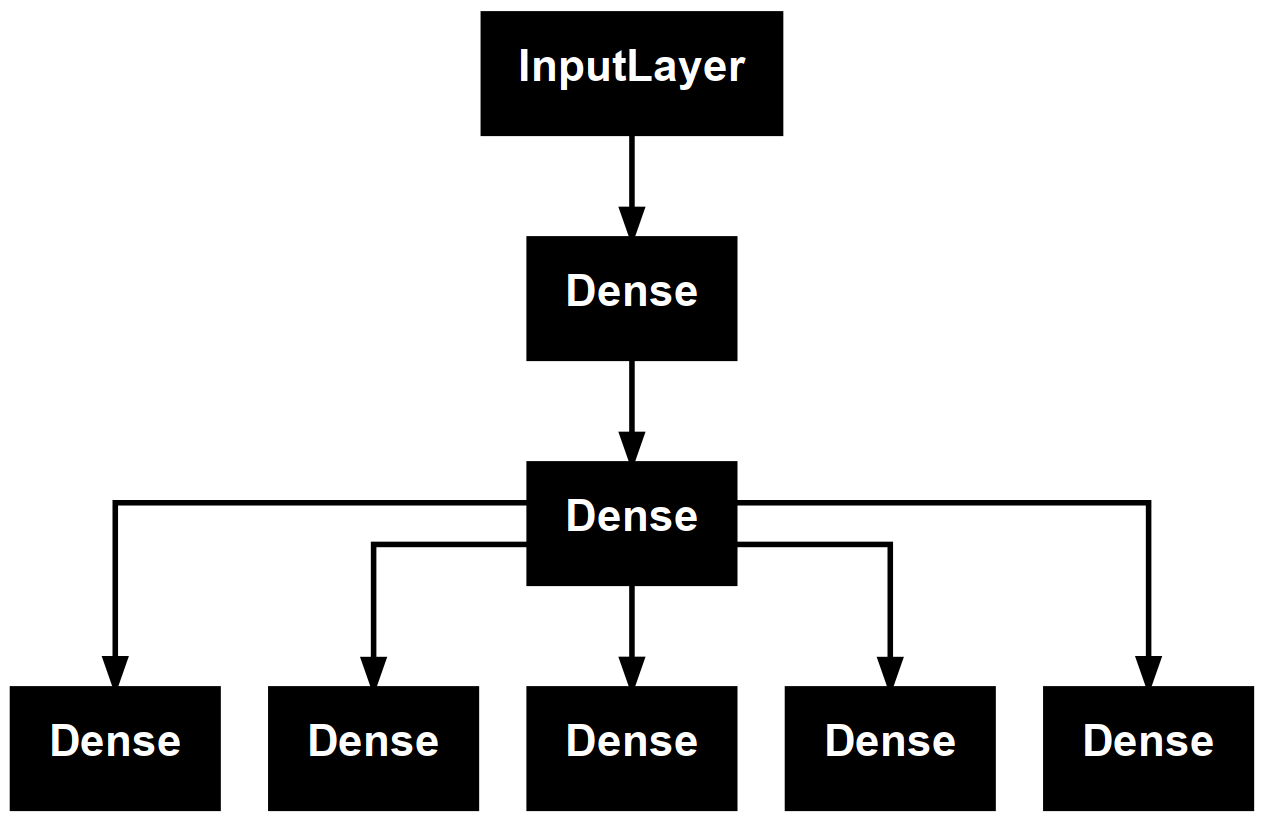

In [187]:
from keras.utils import plot_model
plot_model(model)

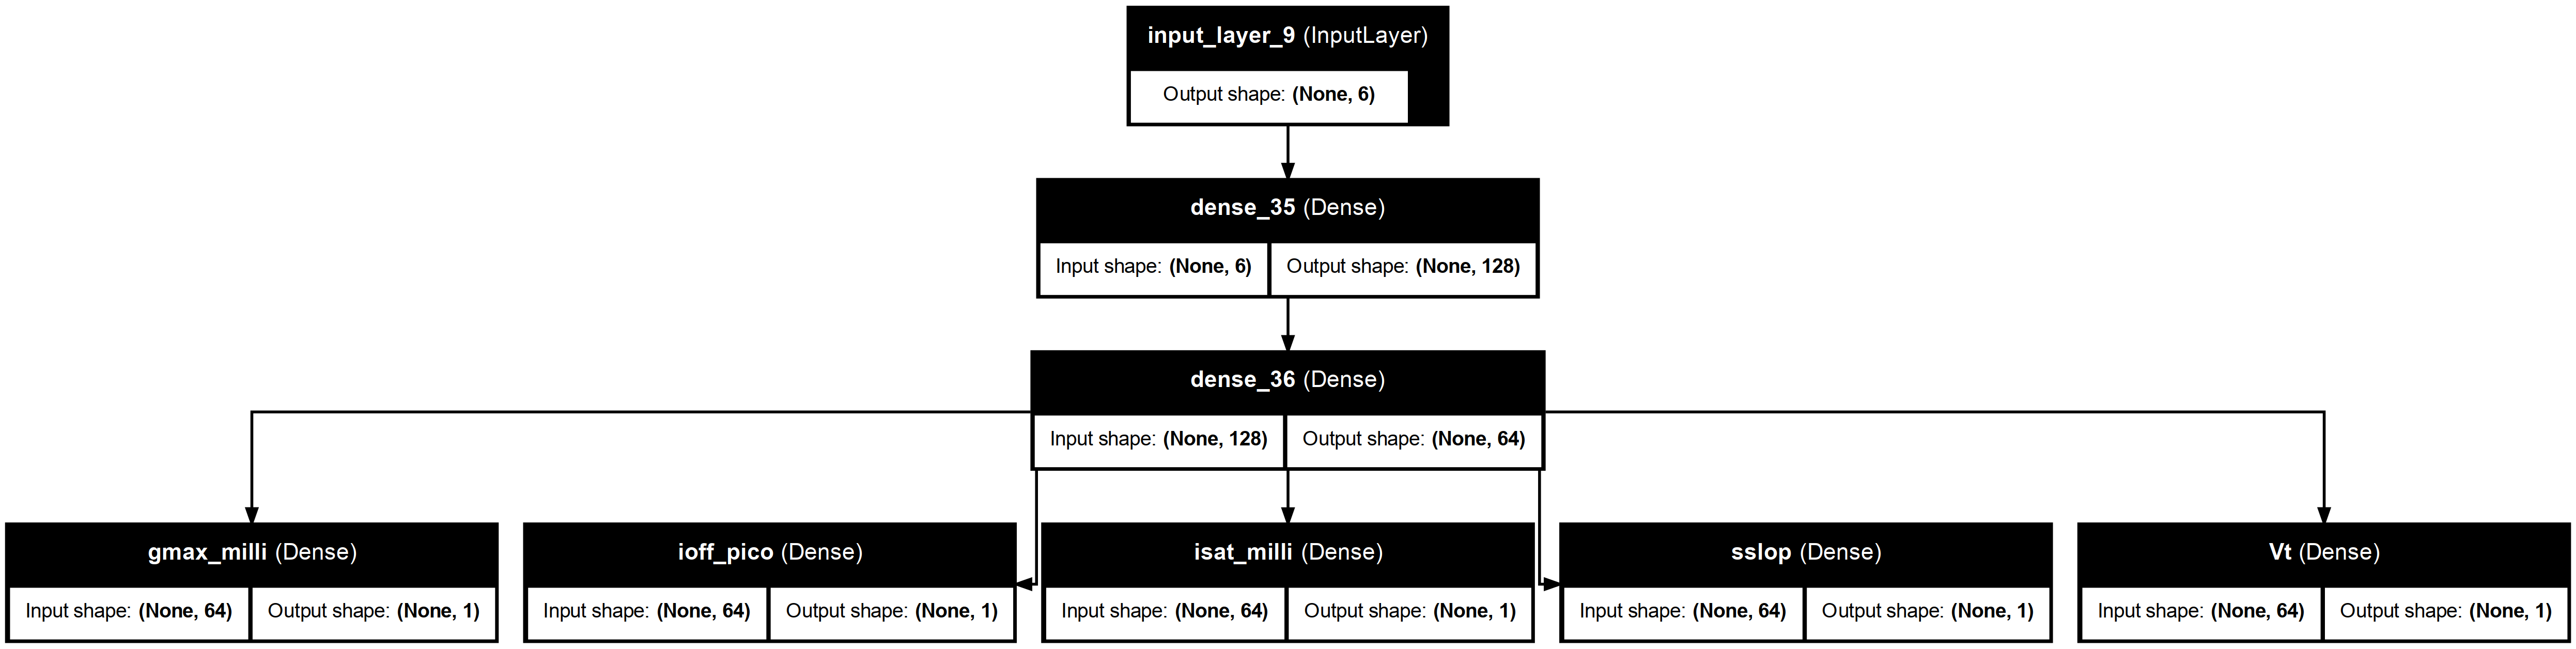

In [188]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [189]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(),
              loss={'gmax_milli': 'mean_squared_error', 
                    'ioff_pico': 'mean_squared_error', 
                    'isat_milli': 'mean_squared_error', 
                    'sslop': 'mean_squared_error', 
                    'Vt': 'mean_squared_error'},
              metrics={'gmax_milli': ['mae'], 
                       'ioff_pico': ['mae'], 
                       'isat_milli': ['mae'], 
                       'sslop': ['mae'], 
                       'Vt': ['mae']})

In [190]:
output_gmax[0]

<KerasTensor shape=(1,), dtype=float32, sparse=False, name=keras_tensor_106>

In [191]:

# model.fit(x_train, y_train, epochs=10, batch_size=10)


In [192]:
df = df.rename(columns={'gmax(milli)': 'gmax_milli','ioff(pico)' : 'ioff_pico','isat(milli)' : 'isat_milli'})

output_params = ['gmax(milli)', 'ioff(pico)', 'isat(milli)',
       'sslop', 'vt']

In [193]:
# y_param = 'gmax_milli'
# train_frac = 0.7
# test_frac = 0.3
# output_params = ['gmax_milli', 'ioff_pico', 'isat_milli','sslop', 'Vt']

# test_n = int(test_frac * len(df))
# train_n = int(train_frac * len(df))

# test_indices = np.random.choice(df.index, test_n, replace=True)
# test_df = df.loc[test_indices]
# train_df = df.drop(test_indices)
# train_indices = np.random.choice(train_df.index, train_n, replace=True)
# train_df_part = train_df.loc[train_indices]

# x_train = train_df_part.drop(output_params, axis=1)
# x_test = test_df.drop(output_params, axis=1)

# y_train = train_df_part[y_param]
# y_test = test_df[y_param]  

# train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))



In [194]:
# import numpy as np
# import tensorflow as tf
# from keras.models import Model
# from keras.layers import Input, Dense
# from keras.optimizers import Adam
# import pandas as pd

# # Assuming df is your DataFrame
# # df = pd.read_csv('your_dataset.csv')  # Example of loading data

# # Correctly renaming the columns
# df = df.rename(columns={'gmax(milli)': 'gmax_milli', 'ioff(pico)': 'ioff_pico', 'isat(milli)': 'isat_milli'})

# input_params = Input(shape=(6,))  # Adjust input shape based on the number of features

# # Define hidden layers
# hidden_layer1 = Dense(256, activation='relu')(input_params)
# hidden_layer2 = Dense(128, activation='relu')(hidden_layer1)

# # Define output layers
# output_gmax = Dense(1, name='gmax_milli', activation='linear')(hidden_layer2)
# output_ioff = Dense(1, name='ioff_pico', activation='linear')(hidden_layer2)
# output_isat = Dense(1, name='isat_milli', activation='linear')(hidden_layer2)
# output_sslop = Dense(1, name='sslop', activation='linear')(hidden_layer2)
# output_vt = Dense(1, name='vt', activation='linear')(hidden_layer2)

# # Create the model
# model = Model(inputs=input_params, outputs=[output_gmax, output_ioff, output_isat, output_sslop, output_vt])

# # Print the model summary
# model.summary()

# model.compile(optimizer=Adam(),
#               loss={'gmax_milli': 'mean_squared_error', 
#                     'ioff_pico': 'mean_squared_error', 
#                     'isat_milli': 'mean_squared_error', 
#                     'sslop': 'mean_squared_error', 
#                     'vt': 'mean_squared_error'},
#               metrics={'gmax_milli': ['mae'], 
#                        'ioff_pico': ['mae'], 
#                        'isat_milli': ['mae'], 
#                        'sslop': ['mae'], 
#                        'vt': ['mae']})

# output_params = ['gmax_milli', 'ioff_pico', 'isat_milli', 'sslop', 'Vt']

# train_frac = 0.7
# test_frac = 0.3

# train_n = int(train_frac * len(df))
# test_n = len(df) - train_n

# # Shuffle the dataset and split into train and test
# df_shuffled = df.sample(frac=1).reset_index(drop=True)
# train_df = df_shuffled.iloc[:train_n]
# test_df = df_shuffled.iloc[train_n:]

# x_train = train_df.drop(output_params, axis=1).values
# x_test = test_df.drop(output_params, axis=1).values

# y_train = {param: train_df[param].values for param in output_params}
# y_test = {param: test_df[param].values for param in output_params}

# # Train the model
# model.fit(x_train_scaled, y_train, epochs=500, batch_size=10, validation_data=(x_test, y_test))


In [238]:
import numpy as np
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df is your DataFrame
# df = pd.read_csv('your_dataset.csv')  # Example of loading data

# Correctly renaming the columns
df = df.rename(columns={'gmax(milli)': 'gmax_milli', 'ioff(pico)': 'ioff_pico', 'isat(milli)': 'isat_milli'})

input_params = Input(shape=(5,))  # Adjust input shape based on the number of features

# Define hidden layers with added complexity
hidden_layer1 = Dense(256, activation='relu')(input_params)
hidden_layer2 = Dense(128, activation='relu')(hidden_layer1)
hidden_layer3 = Dense(64, activation='relu')(hidden_layer2)
hidden_layer4 = Dense(16, activation='relu')(hidden_layer3)
# hidden_layer5 = Dense(8, activation='relu')(hidden_layer4)

dropout_layer = Dropout(0.3)(hidden_layer4)  # Adding dropout for regularization

# Define output layers
output_gmax = Dense(1, name='gmax_milli', activation='linear')(dropout_layer)
output_ioff = Dense(1, name='ioff_pico', activation='linear')(dropout_layer)
output_isat = Dense(1, name='isat_milli', activation='linear')(dropout_layer)
output_sslop = Dense(1, name='sslop', activation='linear')(dropout_layer)
output_vt = Dense(1, name='Vt', activation='linear')(dropout_layer)

# Create the model
model = Model(inputs=input_params, outputs=[output_gmax, output_ioff, output_isat, output_sslop, output_vt])

# Print the model summary
model.summary()

model.compile(optimizer=Adam(learning_rate=0.002),  # Reduce learning rate if needed
              loss={'gmax_milli': 'mean_squared_error', 
                    'ioff_pico': 'mean_squared_error', 
                    'isat_milli': 'mean_squared_error', 
                    'sslop': 'mean_squared_error', 
                    'Vt': 'mean_squared_error'},
              metrics={'gmax_milli': ['mae'], 
                       'ioff_pico': ['mae'], 
                       'isat_milli': ['mae'], 
                       'sslop': ['mae'], 
                       'Vt': ['mae']})

output_params = ['gmax_milli', 'ioff_pico', 'isat_milli', 'sslop', 'Vt']

train_frac = 0.7
test_frac = 0.3

train_n = int(train_frac * len(df))
test_n = len(df) - train_n

# Shuffle the dataset and split into train and test
df_shuffled = df.sample(frac=1).reset_index(drop=True)
train_df = df_shuffled.iloc[:train_n]
test_df = df_shuffled.iloc[train_n:]

x_train = train_df.drop(output_params, axis=1).values
x_test = test_df.drop(output_params, axis=1).values

y_train = {param: train_df[param].values for param in output_params}
y_test = {param: test_df[param].values for param in output_params}

# Normalize the input data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train the model
model.fit(x_train_scaled, y_train, epochs=1000, batch_size=32, validation_data=(x_test_scaled, y_test))


Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18      │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_69 (Dense)    │ (None, 256)       │      1,536 │ input_layer_18[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_70 (Dense)    │ (None, 128)       │     32,896 │ dense_69[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_71 (Dense)    │ (None, 64)        │      8,256 │ dense_70[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_72 (Dense)    │ (None, 16)        │      1,040 │ dense_71[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_15          │ (None, 16)        │          0 │ dense_72[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gmax_milli (Dense)  │ (None, 1)         │         17 │ dropout_15[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ioff_pico (Dense)   │ (None, 1)         │         17 │ dropout_15[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ isat_milli (Dense)  │ (None, 1)         │         17 │ dropout_15[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sslop (Dense)       │ (None, 1)         │         17 │ dropout_15[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Vt (Dense)          │ (None, 1)         │         17 │ dropout_15[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 43,813 (171.14 KB)

 Trainable params: 43,813 (171.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - Vt_mae: 0.2478 - gmax_milli_mae: 0.1901 - ioff_pico_mae: 1.3031 - isat_milli_mae: 0.3164 - loss: 28.8577 - sslop_mae: 0.4078 - val_Vt_mae: 0.1086 - val_gmax_milli_mae: 0.1001 - val_ioff_pico_mae: 0.9541 - val_isat_milli_mae: 0.2562 - val_loss: 9.8810 - val_sslop_mae: 0.2400
Epoch 2/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Vt_mae: 0.2989 - gmax_milli_mae: 0.2094 - ioff_pico_mae: 1.0110 - isat_milli_mae: 0.3578 - loss: 14.0944 - sslop_mae: 0.4038 - val_Vt_mae: 0.0955 - val_gmax_milli_mae: 0.0864 - val_ioff_pico_mae: 0.8104 - val_isat_milli_mae: 0.2389 - val_loss: 5.7993 - val_sslop_mae: 0.1528
Epoch 3/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Vt_mae: 0.2517 - gmax_milli_mae: 0.1507 - ioff_pico_mae: 0.8673 - isat_milli_mae: 0.3121 - loss: 10.3498 - sslop_mae: 0.3273 - val_Vt_mae: 0.0552 - val_gmax_milli_mae: 0.0770 - val_ioff_pico_mae: 0.9758 - val_isat_milli_mae: 0.2166 - val_loss: 10.0994 - val_sslop_mae: 0.1693
Epoch 4/1000

In [237]:
import numpy as np
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df is your DataFrame
# df = pd.read_csv('your_dataset.csv')  # Example of loading data

# Correctly renaming the columns
df = df.rename(columns={'gmax(milli)': 'gmax_milli', 'ioff(pico)': 'ioff_pico', 'isat(milli)': 'isat_milli'})

input_params = Input(shape=(5,))  # Adjust input shape based on the number of features

# Define hidden layers with added complexity
hidden_layer1 = Dense(256, activation='relu')(input_params)
hidden_layer2 = Dense(128, activation='relu')(hidden_layer1)
hidden_layer3 = Dense(64, activation='relu')(hidden_layer2)
hidden_layer4 = Dense(32, activation='relu')(hidden_layer3)

dropout_layer = Dropout(0.3)(hidden_layer4)  # Increased dropout for regularization

# Define output layers
output_gmax = Dense(1, name='gmax_milli', activation='linear')(dropout_layer)
output_ioff = Dense(1, name='ioff_pico', activation='linear')(dropout_layer)
output_isat = Dense(1, name='isat_milli', activation='linear')(dropout_layer)
output_sslop = Dense(1, name='sslop', activation='linear')(dropout_layer)
output_vt = Dense(1, name='Vt', activation='linear')(dropout_layer)

# Create the model
model = Model(inputs=input_params, outputs=[output_gmax, output_ioff, output_isat, output_sslop, output_vt])

# Print the model summary
model.summary()

# Compile the model with a reduced learning rate and added regularization
model.compile(optimizer=Adam(learning_rate=0.0001),  # Reduced learning rate
              loss={'gmax_milli': 'mean_squared_error', 
                    'ioff_pico': 'mean_squared_error', 
                    'isat_milli': 'mean_squared_error', 
                    'sslop': 'mean_squared_error', 
                    'Vt': 'mean_squared_error'},
              metrics={'gmax_milli': ['mae'], 
                       'ioff_pico': ['mae'], 
                       'isat_milli': ['mae'], 
                       'sslop': ['mae'], 
                       'Vt': ['mae']})

output_params = ['gmax_milli', 'ioff_pico', 'isat_milli', 'sslop', 'Vt']

train_frac = 0.7
test_frac = 0.3

train_n = int(train_frac * len(df))
test_n = len(df) - train_n

# Shuffle the dataset and split into train and test
df_shuffled = df.sample(frac=1).reset_index(drop=True)
train_df = df_shuffled.iloc[:train_n]
test_df = df_shuffled.iloc[train_n:]

x_train = train_df.drop(output_params, axis=1).values
x_test = test_df.drop(output_params, axis=1).values

y_train = {param: train_df[param].values for param in output_params}
y_test = {param: test_df[param].values for param in output_params}

# Normalize the input data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
model.fit(x_train_scaled, y_train, 
          epochs=1000,  # Increased epochs
          batch_size=16,  # Reduced batch size
          validation_data=(x_test_scaled, y_test),
          callbacks=[early_stopping])


Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17      │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_65 (Dense)    │ (None, 256)       │      1,536 │ input_layer_17[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_66 (Dense)    │ (None, 128)       │     32,896 │ dense_65[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_67 (Dense)    │ (None, 64)        │      8,256 │ dense_66[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_68 (Dense)    │ (None, 32)        │      2,080 │ dense_67[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 32)        │          0 │ dense_68[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gmax_milli (Dense)  │ (None, 1)         │         33 │ dropout_14[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ioff_pico (Dense)   │ (None, 1)         │         33 │ dropout_14[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ isat_milli (Dense)  │ (None, 1)         │         33 │ dropout_14[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sslop (Dense)       │ (None, 1)         │         33 │ dropout_14[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Vt (Dense)          │ (None, 1)         │         33 │ dropout_14[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 44,933 (175.52 KB)

 Trainable params: 44,933 (175.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - Vt_mae: 0.1486 - gmax_milli_mae: 0.3410 - ioff_pico_mae: 1.2125 - isat_milli_mae: 0.7312 - loss: 22.2066 - sslop_mae: 0.4476 - val_Vt_mae: 0.1247 - val_gmax_milli_mae: 0.2034 - val_ioff_pico_mae: 1.7856 - val_isat_milli_mae: 0.5431 - val_loss: 38.8180 - val_sslop_mae: 0.3123
Epoch 2/1000
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Vt_mae: 0.1433 - gmax_milli_mae: 0.1835 - ioff_pico_mae: 1.1724 - isat_milli_mae: 0.5061 - loss: 20.3758 - sslop_mae: 0.2891 - val_Vt_mae: 0.0573 - val_gmax_milli_mae: 0.1414 - val_ioff_pico_mae: 1.6978 - val_isat_milli_mae: 0.3479 - val_loss: 36.9580 - val_sslop_mae: 0.1629
Epoch 3/1000
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Vt_mae: 0.1582 - gmax_milli_mae: 0.1512 - ioff_pico_mae: 1.1572 - isat_milli_mae: 0.3283 - loss: 22.7528 - sslop_mae: 0.1998 - val_Vt_mae: 0.0620 - val_gmax_milli_mae: 0.1118 - val_ioff_pico_mae: 1.5849 - val_isat_milli_mae: 0.2381 - val_loss: 35.2293 - val_sslop_mae: 0.0900
Epoch 4/10

In [239]:
y_pred = model.predict(x_test_scaled)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [240]:
gmax_pred = y_pred[0]
ioff_pred = y_pred[1]
isat_pred = y_pred[2]
sslop_pred = y_pred[3]
Vt_pred = y_pred[4]

In [241]:
gmax_test = y_test['gmax_milli']

In [242]:
from sklearn.metrics import r2_score
r2_score(gmax_test,ioff_pred)

-8976.55910572519

In [243]:
baseline_mae = mean_absolute_error(y_test['gmax_milli'], [y_train['gmax_milli'].mean()] * len(y_test['gmax_milli']))
print(f'Baseline MAE for gmax_milli: {baseline_mae}')


Baseline MAE for gmax_milli: 0.041414435165372465


In [244]:
mape_gmax_milli = np.mean(np.abs((y_test['gmax_milli'] - y_pred_gmax_milli) / y_test['gmax_milli'])) * 100
print(f'MAPE for gmax_milli: {mape_gmax_milli}%')


MAPE for gmax_milli: 31.524838352484153%


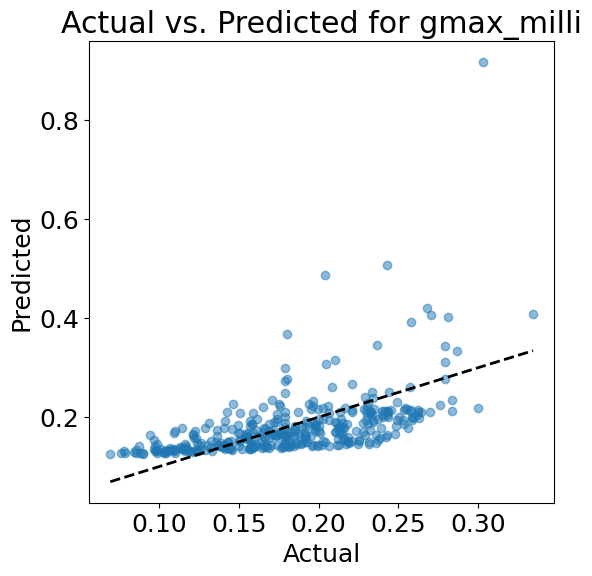

In [245]:
import matplotlib.pyplot as plt

plt.scatter(y_test['gmax_milli'], gmax_pred, alpha=0.5)
plt.plot([y_test['gmax_milli'].min(), y_test['gmax_milli'].max()], [y_test['gmax_milli'].min(), y_test['gmax_milli'].max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted for gmax_milli')
plt.show()


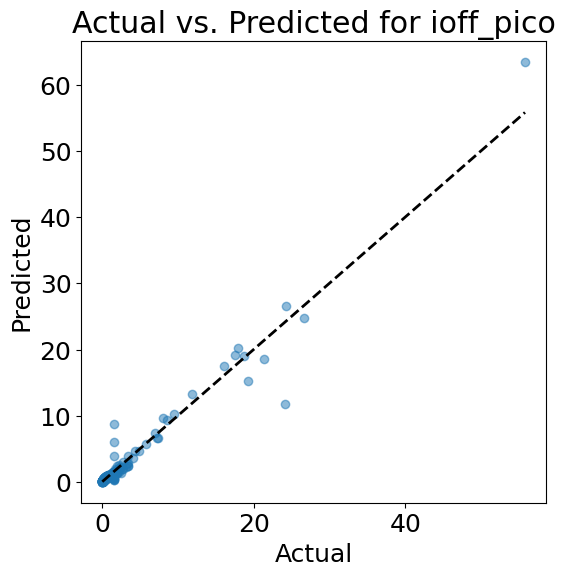

In [246]:
plt.scatter(y_test['ioff_pico'], ioff_pred, alpha=0.5)
plt.plot([y_test['ioff_pico'].min(), y_test['ioff_pico'].max()], [y_test['ioff_pico'].min(), y_test['ioff_pico'].max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted for ioff_pico')
plt.show()

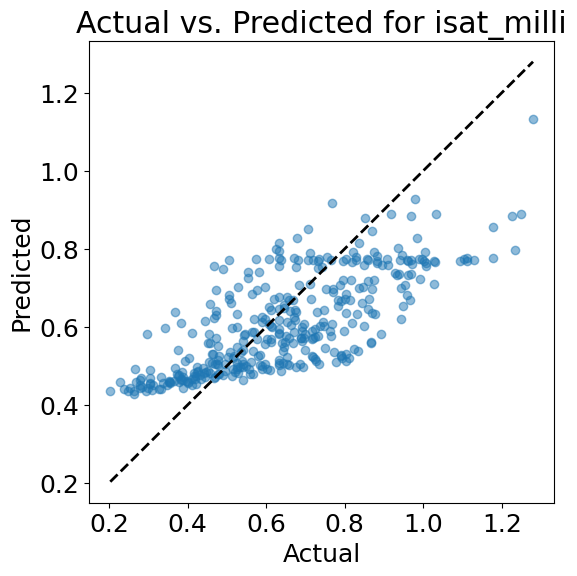

In [247]:
plt.scatter(y_test['isat_milli'], isat_pred, alpha=0.5)
plt.plot([y_test['isat_milli'].min(), y_test['isat_milli'].max()], [y_test['isat_milli'].min(), y_test['isat_milli'].max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted for isat_milli')
plt.show()

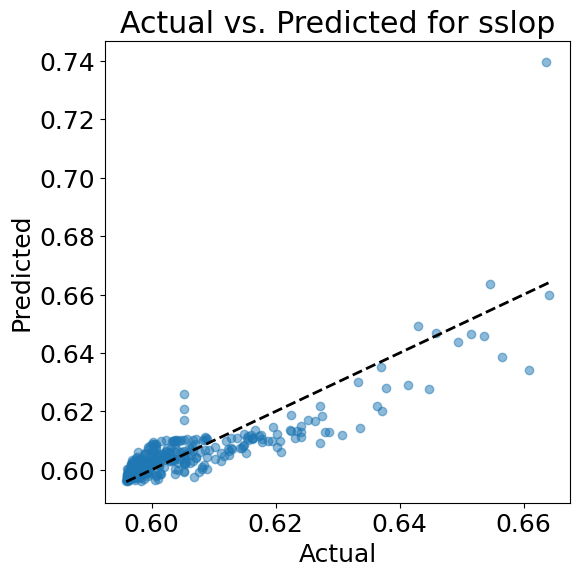

In [248]:
plt.scatter(y_test['sslop'], sslop_pred, alpha=0.5)
plt.plot([y_test['sslop'].min(), y_test['sslop'].max()], [y_test['sslop'].min(), y_test['sslop'].max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted for sslop')
plt.show()

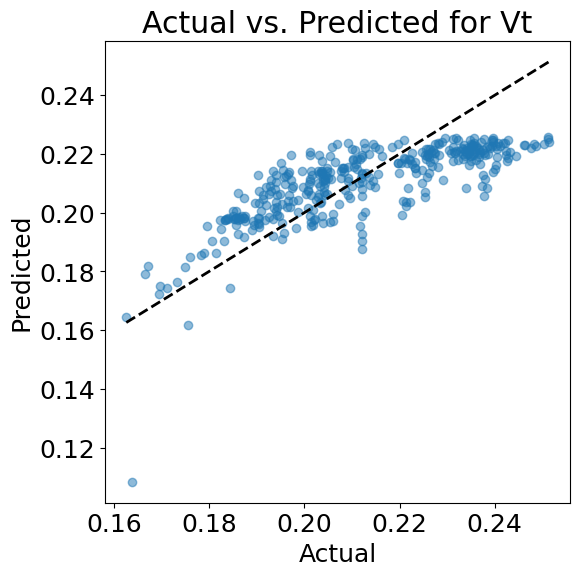

In [249]:
plt.scatter(y_test['Vt'], Vt_pred, alpha=0.5)
plt.plot([y_test['Vt'].min(), y_test['Vt'].max()], [y_test['Vt'].min(), y_test['Vt'].max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted for Vt')
plt.show()

In [250]:
from sklearn.metrics import mean_absolute_error

# Assuming predictions is a list of numpy arrays corresponding to each output
y_pred_gmax_milli = y_pred[0]
y_pred_ioff_pico = y_pred[1]
y_pred_isat_milli = y_pred[2]
y_pred_sslop = y_pred[3]
y_pred_Vt = y_pred[4]

# Calculate MAE for each output
mae_gmax_milli = mean_absolute_error(y_test['gmax_milli'], y_pred_gmax_milli)
mae_ioff_pico = mean_absolute_error(y_test['ioff_pico'], y_pred_ioff_pico)
mae_isat_milli = mean_absolute_error(y_test['isat_milli'], y_pred_isat_milli)
mae_sslop = mean_absolute_error(y_test['sslop'], y_pred_sslop)
mae_Vt = mean_absolute_error(y_test['Vt'], y_pred_Vt)

# Print the results
print(f'MAE for gmax_milli: {mae_gmax_milli}')
print(f'MAE for ioff_pico: {mae_ioff_pico}')
print(f'MAE for isat_milli: {mae_isat_milli}')
print(f'MAE for sslop: {mae_sslop}')
print(f'MAE for Vt: {mae_Vt}')


MAE for gmax_milli: 0.037234057838767425
MAE for ioff_pico: 0.31155863355956437
MAE for isat_milli: 0.12337755931187973
MAE for sslop: 0.004263134092562064
MAE for Vt: 0.01106955082573785


In [251]:
y_test

{'gmax_milli': array([0.19516727, 0.27045048, 0.23420685, 0.21228771, 0.17381801,
        0.1802759 , 0.23172098, 0.25704166, 0.23151575, 0.17406389,
        0.1575993 , 0.17928443, 0.21559435, 0.18193104, 0.17928443,
        0.2360608 , 0.17928443, 0.13251585, 0.14611746, 0.15089633,
        0.12900912, 0.10529325, 0.18729799, 0.1552133 , 0.24287684,
        0.17784171, 0.17928443, 0.24947757, 0.19742333, 0.21003631,
        0.11862904, 0.14006734, 0.18965147, 0.21313041, 0.16002026,
        0.23044639, 0.17614051, 0.17928443, 0.21579656, 0.23336596,
        0.12117582, 0.14069823, 0.0986    , 0.15047138, 0.18855535,
        0.17130178, 0.11005559, 0.21613804, 0.12480831, 0.14345462,
        0.17928443, 0.25826914, 0.20071396, 0.16750804, 0.21839143,
        0.206736  , 0.17968241, 0.0786    , 0.0978    , 0.11616193,
        0.22122364, 0.17315568, 0.20006235, 0.25316606, 0.0853    ,
        0.15800415, 0.13957468, 0.21536228, 0.25812736, 0.0761    ,
        0.12221307, 0.11364484, 0.

In [241]:
model.evaluate(x_test,y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Vt_mae: 0.0788 - gmax_milli_mae: 0.2352 - ioff_pico_mae: 0.3163 - isat_milli_mae: 0.0843 - loss: 0.2773 - sslop_mae: 0.0506 


[0.26641222834587097,
 0.08001384139060974,
 0.23286738991737366,
 0.3210497498512268,
 0.08301730453968048,
 0.05073388293385506]

In [242]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# from scikeras.wrappers import KerasRegressor
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.optimizers import Adam

# # Create the ANN model
# def create_model(optimizer='adam', init='uniform', activation='relu', neurons=1):
#     model = Sequential()
#     model.add(Dense(neurons, input_dim=x_train.shape[1], kernel_initializer=init, activation=activation))
#     model.add(Dense(1, kernel_initializer=init))
#     model.compile(loss='mean_squared_error', optimizer=optimizer)
#     return model

# # Define the function to build and evaluate the model
# def build_model(regression_fn,                
#                 y_param,
#                 test_frac=0.3,
#                 train_frac=0.7,
#                 hyperparams=None
#                ):
    
#     # Split the data
#     test_n = int(test_frac * len(df))
#     train_n = int(train_frac * len(df))
    
#     test_indices = np.random.choice(df.index, test_n, replace=False)
#     test_df = df.loc[test_indices]
#     train_df = df.drop(test_indices)
#     train_indices = np.random.choice(train_df.index, train_n, replace=False)
#     train_df_part = train_df.loc[train_indices]
    
#     x_train = train_df_part.drop(y_param, axis=1)
#     x_test = test_df.drop(y_param, axis=1)
    
#     y_train = train_df_part[y_param]
#     y_test = test_df[y_param]  # Target
    
#     # Feature scaling
#     scaler = StandardScaler()
#     x_train_scaled = scaler.fit_transform(x_train)
#     x_test_scaled = scaler.transform(x_test)
    
#     # Hyperparameter tuning using GridSearchCV
#     if hyperparams is not None:
#         model = GridSearchCV(KerasRegressor(build_fn=regression_fn, verbose=0), hyperparams, cv=3, scoring='neg_mean_squared_error')
#         model.fit(x_train_scaled, y_train)
#         print("Best hyperparameters:", model.best_params_)
#         best_model = model.best_estimator_
#     else:
#         best_model = KerasRegressor(build_fn=regression_fn, verbose=0)
#         best_model.fit(x_train_scaled, y_train)
    
#     y_pred = best_model.predict(x_test_scaled)
    
#     # RMSE (Root Mean Square Error)
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     print("RMSE:", rmse)
    
#     # R² score
#     r2score = r2_score(y_test, y_pred)
#     print("R² score:", r2score, '\n')
    
#     print("Training_score : " , best_model.score(x_train_scaled, y_train))

#     return [
#         np.array(y_test),
#         y_pred,
#         r2score,
#         rmse
#     ]

# # Define hyperparameters grid
# hyperparams_grid = {
#     'neurons': [5, 10, 15],  # Number of neurons in the first hidden layer
#     'batch_size': [10, 20, 30],  # Number of samples per gradient update
#     'epochs': [50, 100, 150],  # Number of epochs
#     'optimizer': ['adam', 'rmsprop'],  # Optimizers
#     'init': ['uniform', 'normal'],  # Weight initialization methods
#     'activation': ['relu', 'tanh']  # Activation functions
# }

# # Assuming df is your dataframe and 'gmax_SHE' is the target column
# # df = pd.read_csv('your_data.csv')  # Replace with your actual data

# # Call the function with hyperparameter tuning
# y_test, y_pred, r2score, rmse = build_model(create_model, 'gmax_milli', hyperparams=hyperparams_grid)

# # Print the results
# print("Actual Test Values:", y_test)
# print("Predicted Values:", y_pred)
# print("R² Score:", r2score)
# print("RMSE:", rmse)
